# EDA Obesity prediction
##### Larissa Voshol | Klas bfv2 | 05/03/2024

Dit is een dataset die doormiddel van een enquete mensen verschillende vragen heeft gesteld over levenstijl. Om op die manier te kijken naar verbindingen tussen obesitas en hun levens stijl.
obesitas wordt gebasseert op de BMI waarde die verdeelt is in verschillende groepen.

NObesity values are:

•Underweight Less than 18.5  
•Normal 18.5 to 24.9  
•Overweight 25.0 to 29.9  
•Obesity I 30.0 to 34.9  
•Obesity II 35.0 to 39.9  
•Obesity III Higher than 40  

Er zijn vragen gesteld over de volgende onderwerpen:  
Frequent consumption of high caloric food (FAVC)  
Frequency of consumption of vegetables (FCVC)  
Number of main meals (NCP)  
Consumption of food between meals (CAEC)  
Consumption of water daily (CH20)  
and Consumption of alcohol (CALC)  
The attributes related with the physical condition are: Calories consumption monitoring (SCC)  
Physical activity frequency (FAF)  
Time using technology devices (TUE)  
Transportation used (MTRANS)


In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data openen en even met de oogjes naar kijken. Daarna ook even met wat machinale oogjes naar kijken die er mooi grafieken van maken voor onze oogjes.

In [6]:
df_obesity_full = pd.read_csv('data/ObesityDataSet.csv')
df_obesity_full.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df_obesity = df_obesity_full

In [9]:
df_obesity.shape


(2111, 17)

Zo krijg je het eerste idee wat er in deze dataset zit.
hij bestaat zoals je bovenstaande kan zien uit 2111 patiënten.

__Codebook__

Bij deze dataset is de bijbehorende codebook deze zal ik hierna vergelijken welke types de data is ingeladen en met welke het gebruikt zal worden.

In [10]:
codebook = {
    "attribute": df_obesity.columns.tolist(),
    "unit": ["n.a.", "jaar", "meter", "kilogram", "n.a.", "n.a.", "frequentie", "frequentie", "n.a.", "n.a", "frequentie", "n.a.", "frequentie", "frequentie", "n.a", "n.a", "n.a."],
    "dtype": ["string", "Uint8", "float32", "Uint8", "boolean", "boolean", "Uint8", "Unit8", "string", "boolean", "Uint8", "boolean", "Uint8", "Uint8", "string", "string", "string"],
    "description": ["Geslacht",
                    "Leeftijd",
                    "Lengte",
                    "Gewicht",
                    "Heeft/had een familie last van overwicht",
                    "Vaak consumeren van calorierijke voedsel",
                    "frequentie consumeren van groentes",
                    "Aantal grootte maaltijden",
                    "Consumptie van snacks tussen maaltijden",
                    "Consumptie van water",
                    "Worden calorieën geteld"
                    "Frequentie actieve beweging",
                    "TUE"
                    "Consumptie van Alchol",
                    "Verplaatsingsmethode",
                    "Obesity waarde"]
}

Even kijken of daadwerkelijke eenheden overeenkomend zijn met de verwachtte.

In [ ]:
types = df_obesity.dtypes.reset_index()
types = pd.concat([types, pd.DataFrame(codebook["dtype"])], ignore_index=True, axis=1, names=["object", "werkelijkheid", "Theoretisch"])
types.set_index(0, inplace=True)

types

,1,2
0,,
Gender,object,string
Age,float64,Uint8
Height,float64,float32
Weight,float64,Uint8
family_history_with_overweight,object,boolean
FAVC,object,boolean
FCVC,float64,Uint8
NCP,float64,Unit8
CAEC,object,string


De eerste kolom wat dus de werkelijke eenheden zijn en de tweede welke ik dus theoretisch aan het ding heb gegeven. Maar dit is opzich overeenkomend. Voor makkelijk gebruik maak ik een waarde waar de kolomnamen in staan van de factoren die met die bepaalde eenheid zijn beantwoord.

In [11]:
int_value = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
str_value = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

#### Data bekijken

## univariaat

Zie hieronder de data in een simpele manier beschreven. Je kan hier standaard informatie vinden over de numerieke data, je kan hierbij denken aan: gemiddelde, minimum, maximum etc.

In [13]:
df_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Als je kijkt naar het gemiddelde zijn mensen relatief klein met een hoog gewicht. 

__Niet ingevulde data aanwezig__

In [14]:
isna = pd.DataFrame({"isna" : df_obesity.isna().sum(),
                    "isnull" : df_obesity.isnull().sum()})
isna

,isna,isnull
Gender,0,0
Age,0,0
Height,0,0
Weight,0,0
family_history_with_overweight,0,0
FAVC,0,0
FCVC,0,0
NCP,0,0
CAEC,0,0
SMOKE,0,0


Er zijn geen missende waardes aanwezig wat er voor zorgt dat ik geen kolom hoef te verwijderen.

__Verdeling van data__

Nog een keertje kijken naar de mogelijke waarden in de kolommen, omdat een aantal zijn gebasseert op een schaalverdeling. Daarvan zijn dus de verschillende antwoorden onderstaand.

In [ ]:
result_df = pd.DataFrame()

for col in df_obesity:
    unique_values = pd.Series(df_obesity[col].unique(), name=col)
    result_df = pd.concat([result_df, unique_values], axis=1)

result_df.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Male,23.0,1.52,56.0,no,yes,3.000000,1.000000,Frequently,yes,3.000000,yes,3.000000,0.000000,Sometimes,Walking,Overweight_Level_I
2,NaN,27.0,1.80,77.0,NaN,NaN,1.000000,4.000000,Always,NaN,1.000000,NaN,2.000000,2.000000,Frequently,Automobile,Overweight_Level_II
3,NaN,22.0,1.78,87.0,NaN,NaN,2.450218,3.289260,no,NaN,1.152736,NaN,1.000000,0.294990,Always,Motorbike,Obesity_Type_I
4,NaN,29.0,1.50,89.8,NaN,NaN,2.880161,3.995147,NaN,NaN,1.115967,NaN,0.319156,0.838957,NaN,Bike,Insufficient_Weight
5,NaN,24.0,1.64,53.0,NaN,NaN,2.008760,1.726260,NaN,NaN,2.704507,NaN,1.541072,0.479221,NaN,NaN,Obesity_Type_II
6,NaN,26.0,1.72,55.0,NaN,NaN,2.596579,2.581015,NaN,NaN,2.184707,NaN,1.978631,0.625350,NaN,NaN,Obesity_Type_III
7,NaN,41.0,1.85,68.0,NaN,NaN,2.591439,1.600812,NaN,NaN,2.406541,NaN,0.100320,0.265790,NaN,NaN,NaN
8,NaN,30.0,1.65,105.0,NaN,NaN,2.392665,1.737620,NaN,NaN,2.984323,NaN,1.586525,0.555468,NaN,NaN,NaN
9,NaN,52.0,1.77,80.0,NaN,NaN,1.123939,1.105480,NaN,NaN,2.444125,NaN,1.399183,0.928972,NaN,NaN,NaN


Hier kan je dus zijn dat de volgende kolommen nominaal zijn:
family_history_with_overweight
FAVC = Frequent consumption of high caloric food  
SMOKE = frequent smoking
SCC = Calories consumption monitoring
MTRANS = Transportation used

ordinaal zijn:
CAEC = Consumption of food between meals
CALC = Consumption of alcohol
NObeyesdad = labeling of patient

numeriek zijn:
FCVC = Frequency of consumption of vegetables
NCP = Number of main meals
CH2O = Consumption of water daily
FAF = Physical activity frequency
TUE = Time using technology devices

Verder benieuwd naar de verdeling van elke kolom.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

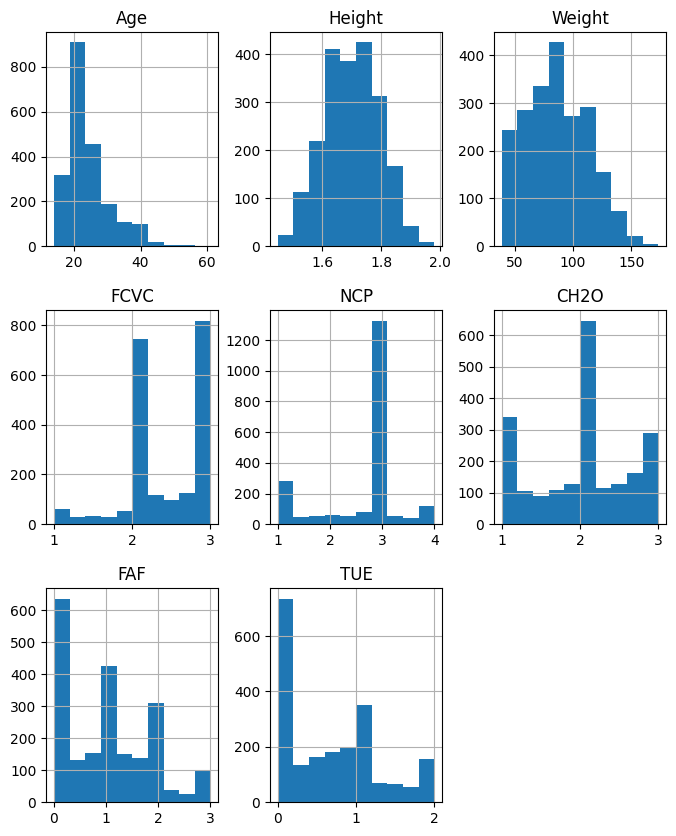

In [ ]:
df_obesity.hist(figsize=(8,10))

Er zijn zeker bij een paar factoren een heel groot verschil in de aantallen bij de factoren. Er zijn wel een paar niet normaalverdeelde kollomen aanwezig. Doormiddel van log en wortel even kijken of dit te verbeteren is.

Even kijken of een wortel verdeling mooier kan zijn.

In [ ]:
for col in int_value:
    new_attribute = "sqrt(" + col + ")"
    df_obesity[new_attribute] = np.sqrt(df_obesity[col])

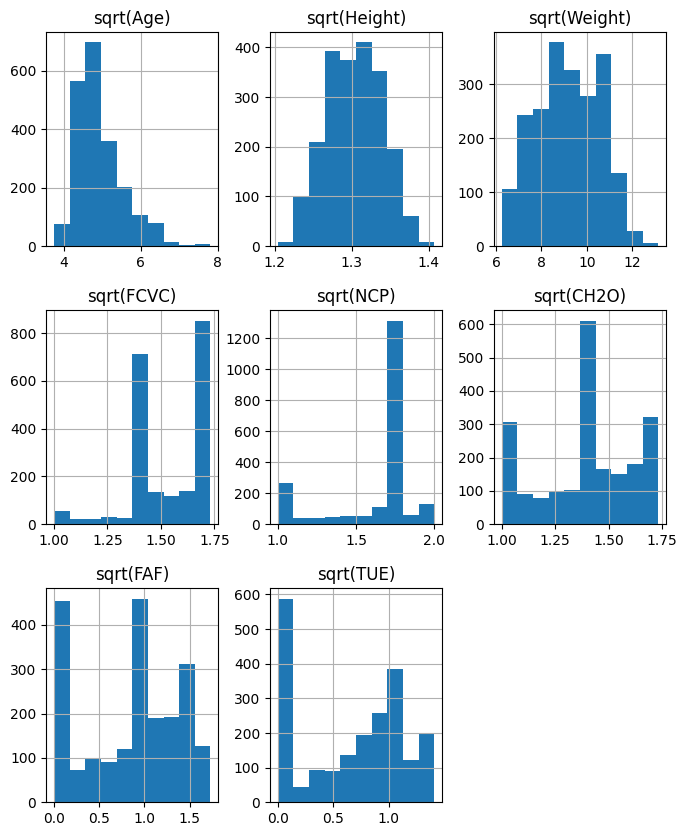

In [ ]:
df_obesity.iloc[:,17:25].hist(figsize=(8,10));

Of mischien een log verdeling.

In [ ]:
for col in int_value:
    new_attribute = "log(" + col + ")"
    df_obesity[new_attribute] = np.log(df_obesity[col])

c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


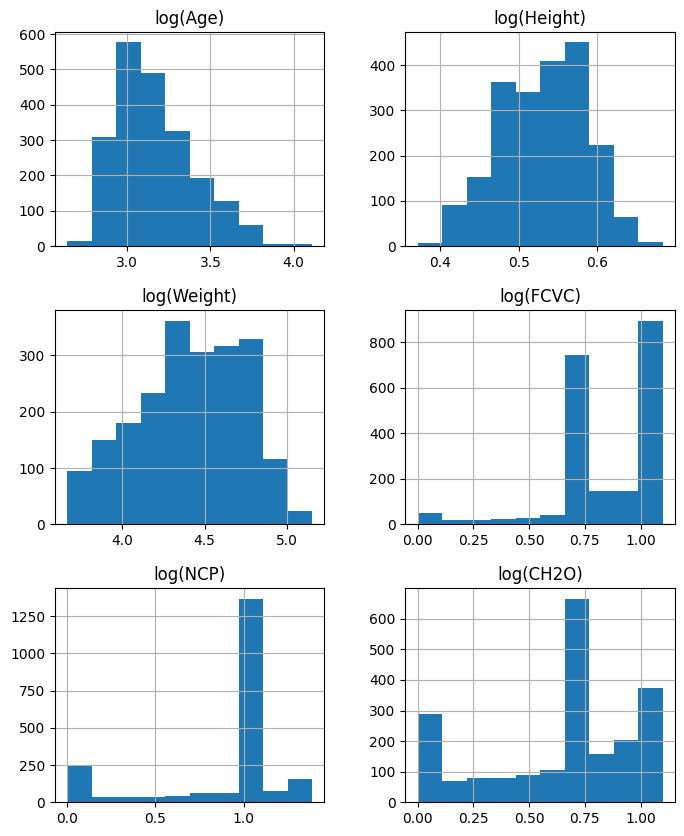

In [ ]:
df_obesity.iloc[:,25:31].hist(figsize=(8,10));

Transformaties zien er niet bepaald uit alsof het beter normaal verdeeld is, behalve voor de log(weight). Dus de transformaties zijn niet nodig, met uitzondering van log(weight) deze zal worden gehouden.

In [ ]:
log_weight = df_obesity["log(Weight)"] 
df_obesity = df_obesity.iloc[:,:17]
df_obesity.reset_index(inplace=True)
df_obesity = pd.concat([df_obesity,log_weight], axis=1)

In [ ]:
df_obesity

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,log(Weight)
0,0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,4.158883
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,4.025352
2,2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,4.343805
3,3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,4.465908
4,4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,4.497585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,4.878311
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,4.895920
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,4.895519
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,4.892952


Even verder focussen op de mannen en vrouwen, omdat er theoretisch een verschil tussen de verschillende groepen zou kunnen zijn.

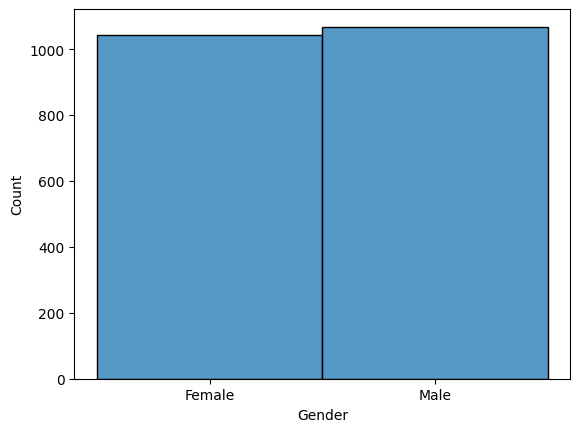

In [ ]:
sns.histplot(df_obesity, x=str_value[0]);


Mannen en vrouwen komen ongeveer evenvaak voor. Dit zorgt ervoor dat er geen overtuigende beredenering zal ontstaan dat gecreerd kan worden door het geslacht. Want vrouwen en mannen hebben een andere lichaamsbouw wat dus op een andere resultaat kan duiden.

Dit zijn de kolom waarden die bezitten over niet numierke eenheden. Daar maak ik apparte staafdiagram en boxplot van.

In [ ]:
str_value

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

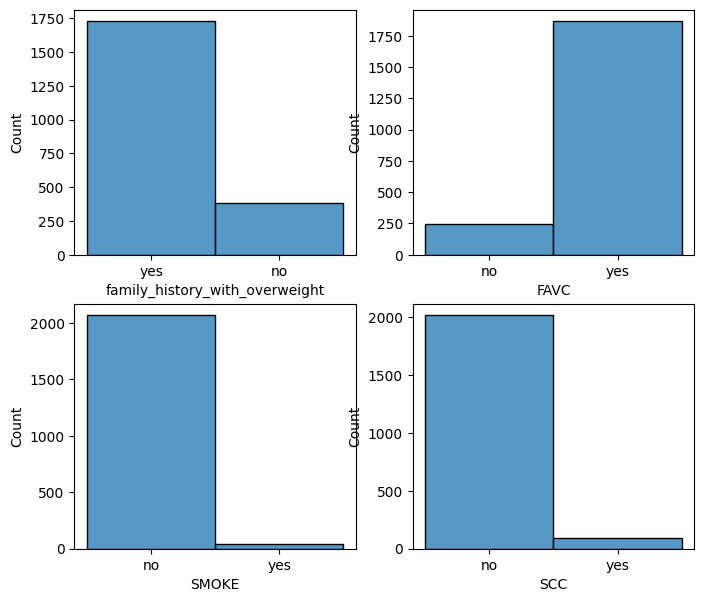

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7));

sns.histplot(df_obesity, x=str_value[1], ax=axes[0,0]);
sns.histplot(df_obesity, x=str_value[2], ax=axes[0,1]);
sns.histplot(df_obesity, x=str_value[4], ax=axes[1,0]);
sns.histplot(df_obesity, x=str_value[5], ax=axes[1,1]);

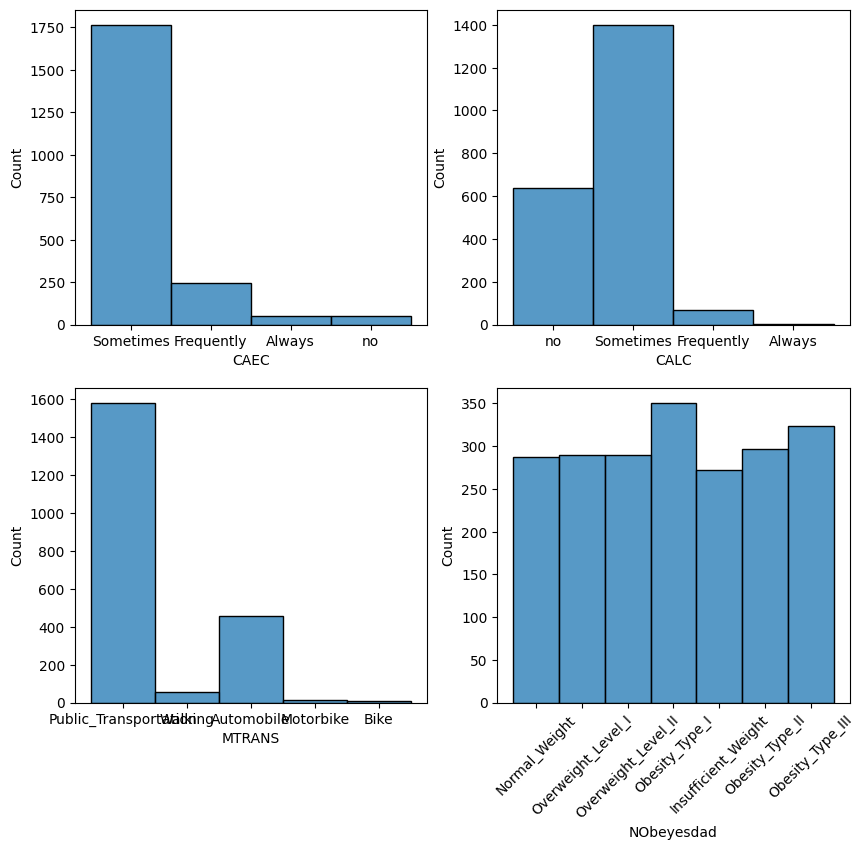

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 9));
sns.histplot(df_obesity, x=str_value[3], ax=ax[0,0]);
sns.histplot(df_obesity, x=str_value[6], ax=ax[0,1]);
sns.histplot(df_obesity, x=str_value[7], ax=ax[1,0]);
sns.histplot(df_obesity, x=str_value[8], ax=ax[1,1]);
plt.xticks(rotation=45);


Vele data is gebaseerd op een schaal, hierin hoef ik dus niet te kijken naar verdeling of er uitschieters aanwezig zijn. De NOBeyesdad is de clafficatie waar naar gekeken wordt. En dat is best aardig gelijk verdeeld. Voor gewicht, leeftijd en lengte is dat nog wel handig om te doen.

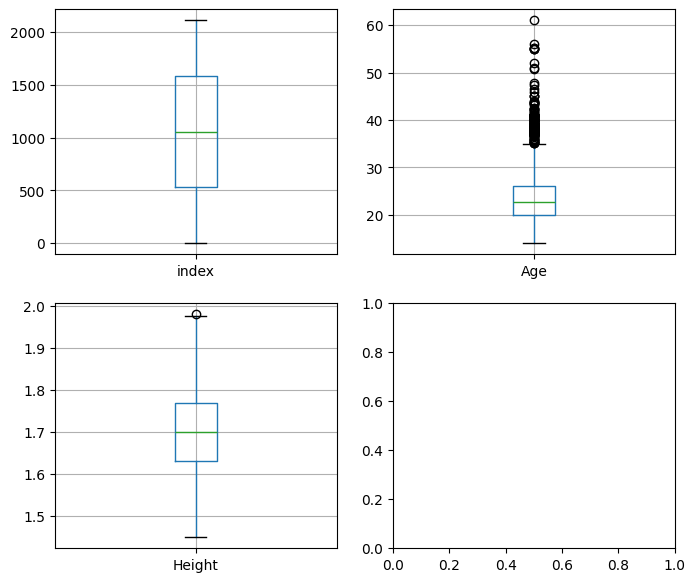

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7));
df_obesity.iloc[:, :2].boxplot(ax=axes[0,0]);
df_obesity.iloc[:, 2:3].boxplot(ax=axes[0,1]);
df_obesity.iloc[:, 3:4].boxplot(ax=axes[1,0]);


Bij gewicht is wel 1 outlier aanwezig, dit kan geen kwaad om die te verwijderen. Dit zal juist de balans terug brengen in die verdeling.

In [ ]:
df_obesity["Weight"].max()
#delete deze ff van df

173.0

## Bivariaat

Verander de niet numeriek waardes even naar getallen dus:

In [38]:
changes = {"frequency": ["No", "Sometimes", "Always", "Frequently"],
           "transportation": ["Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike"],
           "obesity type" : ["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"]
}

In [39]:
df_obesity.replace([True,"yes"], 1, inplace=True)
df_obesity.replace([False, "no"], 0, inplace=True)
for change in changes:
    replace_with = 0
    for replace in changes[change]:
        replace_with +=1
        df_obesity.replace(replace, replace_with, inplace=True)


/tmp/ipykernel_1695307/2407927305.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_obesity.replace(replace, replace_with, inplace=True)


Verder verdiepen in de verdeling van data per feature. Eerst kijken naar de leeftijdverdeling per geslacht.

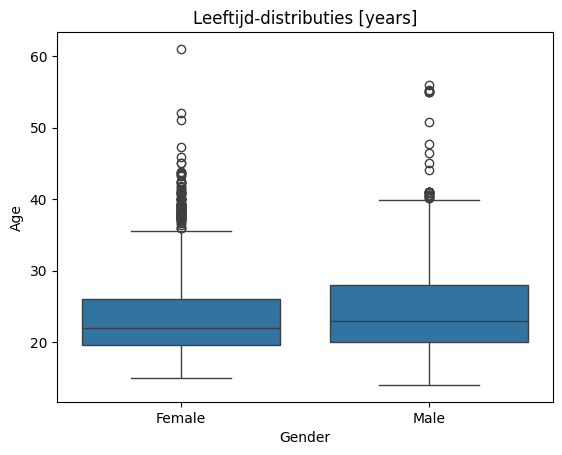

In [ ]:
axs = sns.boxplot(data=df_obesity, x="Gender", y="Age")
axs.set_title("Leeftijd-distributies [years]");

Net was er te zien dat de man en vrouw verdeling met daarbij de classificatie aardig gelijk is verdeeld. Verder kijken of de man en vrouw verdeling ook zo gelijk in de classificatie zelf.

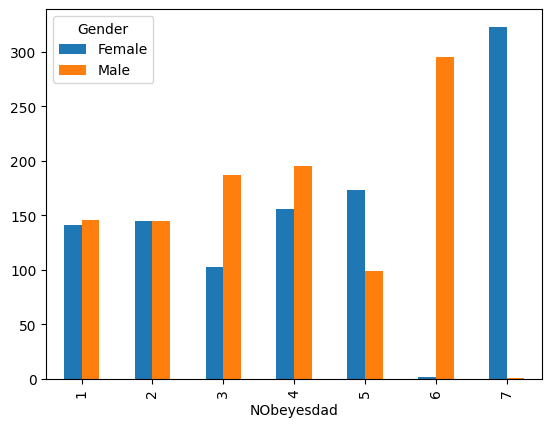

In [ ]:
df_bar = df_obesity.groupby(["NObeyesdad", "Gender"]).size()
df_bar = df_bar.unstack()
df_bar.plot(kind="bar");


Niet alle groepen zijn heel eerlijk verdeeld, maar obesity type 2 en type 3 kunnen wel lastig worden. Omdat er bij beide een duidelijke meerderheid is van 1 geslacht. Dit kan zo zijn ontstaan door de manier van het berekenen van de BMI van mannen en vrouwen. Want bij beiden wordt er rekening gehouden met andere factoren.

wat de man en vrouw verdeling is bij: gewicht, hoogte en leeftijd.

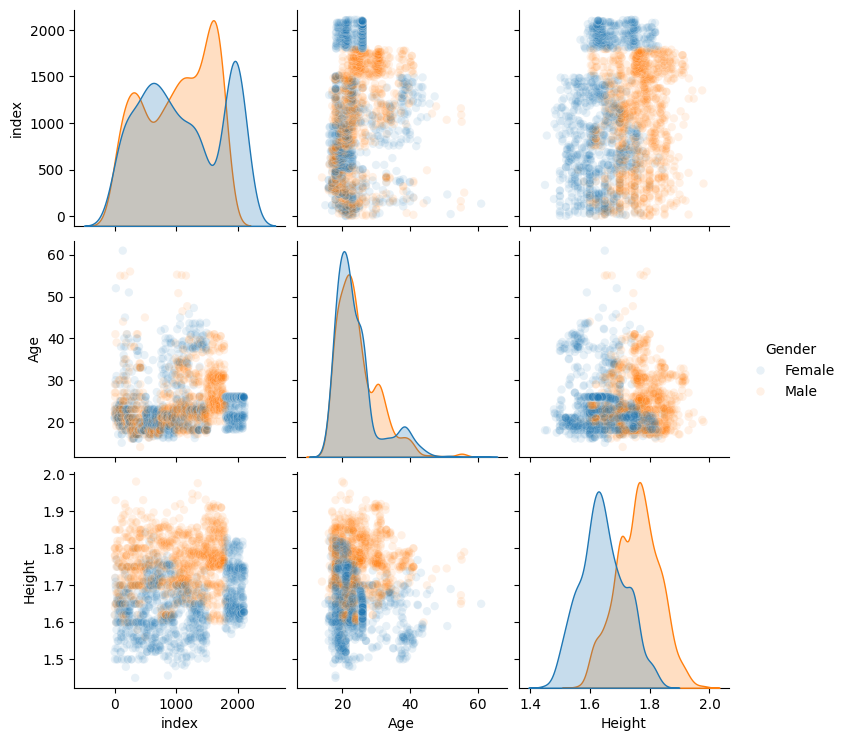

In [ ]:
sns.pairplot(df_obesity.iloc[:, 0:4], hue="Gender", plot_kws={'alpha': 0.1});

Er zijn geen duidelijke clusters te zien.

ik maak ook nog een combo van de overige waardes waar met een numerieke waarde is beantwoord

In [ ]:
int_value

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

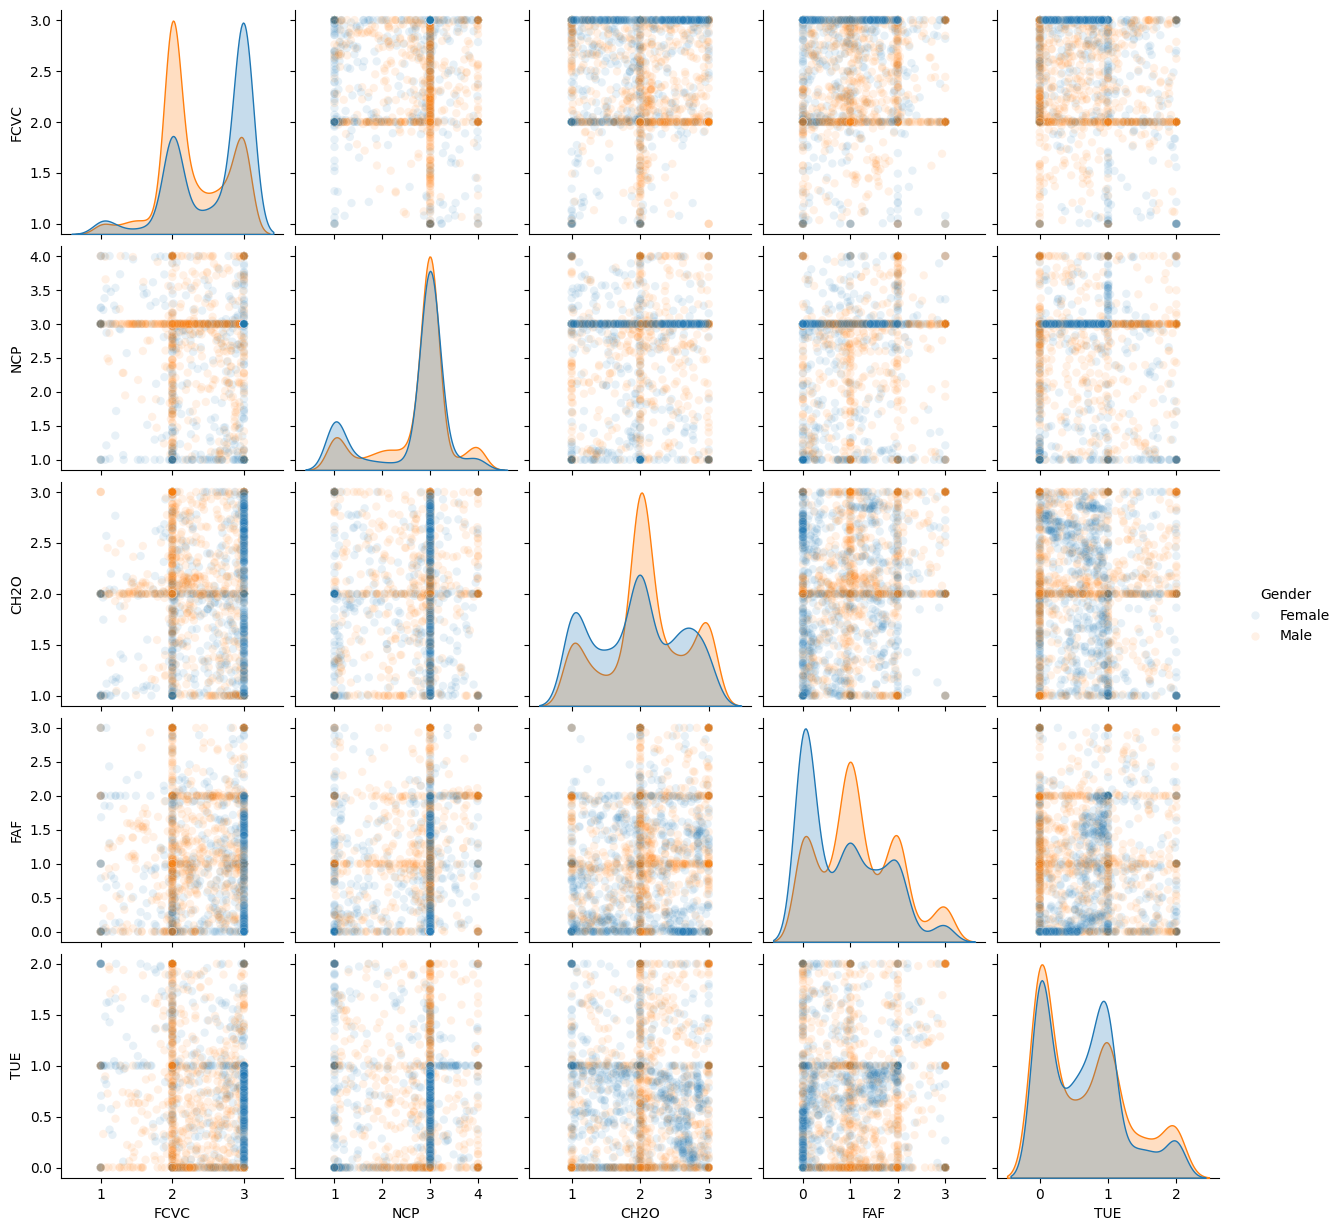

In [ ]:
int_value.append("Gender")
sns.pairplot(df_obesity[int_value[3:]], hue="Gender", plot_kws={'alpha': 0.1})
int_value.remove("Gender")

Doordat de data in groepen was verdeeld is dit ook duidelijk terug te zien in de grafieken. En wederom geen losse clusters. 

hieronder kan je de verdeling zien van de classicatie groepen zien bij gewicht, leeftijd en lengte.

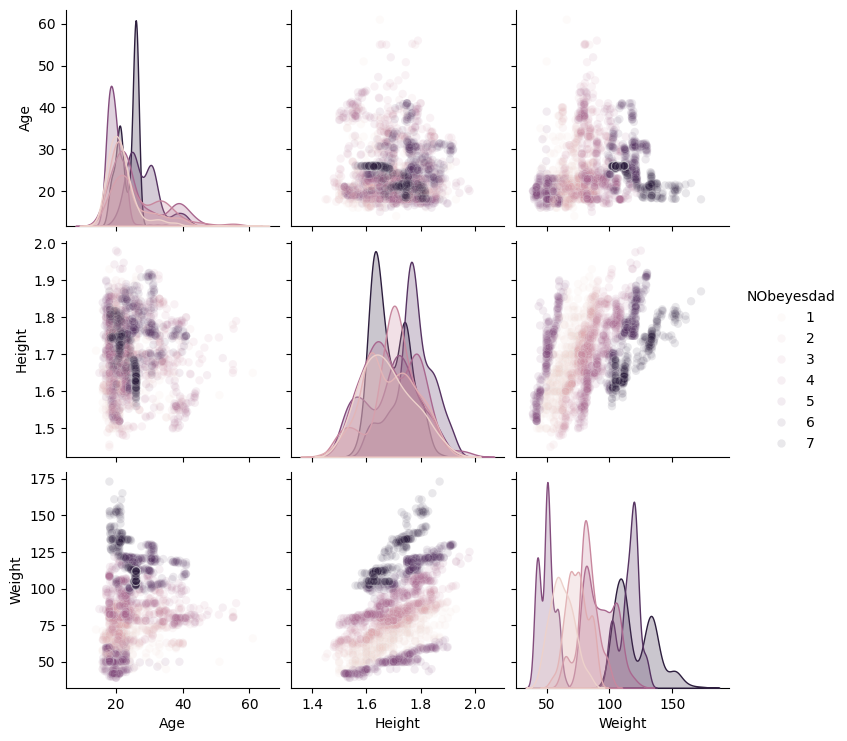

In [ ]:
sns.pairplot(df_obesity[["Age","Height", "Weight", "NObeyesdad"]], hue="NObeyesdad", plot_kws={'alpha': 0.1});

Je ziet duidelijk een vorming van clusters bij gewicht. dit kan niet heel raar zijn want de classificatie is gebasseerd op BMI die gevormd wordt door je gewicht.

In [ ]:
df_obesity.set_index("index",inplace=True)

Hierbij een heatmap voor correlatie tussen alle kolommen.

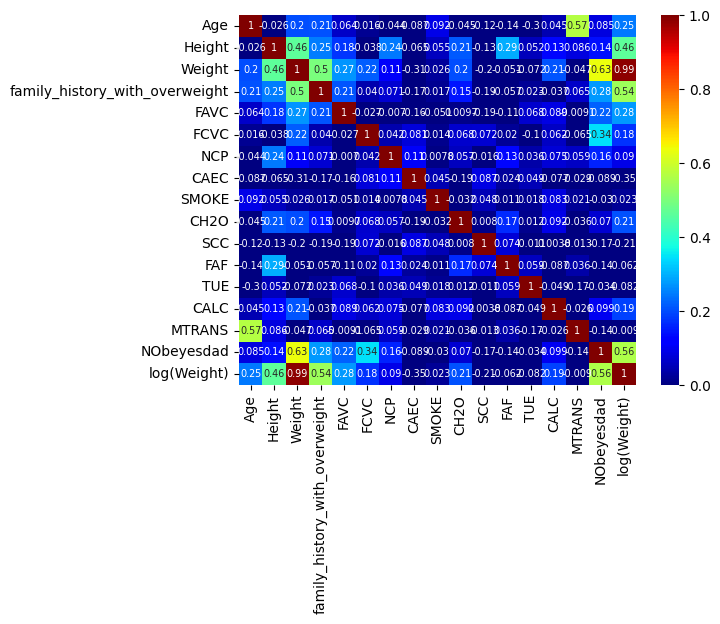

In [ ]:
axs = sns.heatmap(df_obesity.iloc[:, 1:].corr(), annot=True, annot_kws={"fontsize": "x-small"}, cmap="jet", vmin=0.0, vmax=1.0)

Niet echt hele extreme uitschieters, er is een hogere verwachting bij gewicht, familie geschiedenis, FCVC en FAVC.   
FCVC = Frequency of consumption of vegetables  
FAVC = Frequent consumption of high caloric food  

Ik zie wel dat de log(weight) een lagere correlatie heeft dan de normale, hiervoor kies ik er voor om hem toch weer uit te halen.

In [ ]:
df_obesity = df_obesity.iloc[:, :17]

#### Machine learning

Dit is een classificatie probleem, hiervoor zal ik dus verschillende classificatie modellen gebruiken. Het ellement dat het meeste effect heeft dat was een numerieke waarde en de hierop volgende is een ordinale dus zal ik een mix gebruiken van modellen.

Ik kies hier evoor om gewicht en lengte te selecteren om te kijken welke modellen het beste passen. Dit omdat bij het bekijken naar de data je kon aflezen dat gewicht en hoogte veel effect erop hadden.

In [ ]:
df_obesity.iloc[:,1:16]

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
index,,,,,,,,,,,,,,,
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1
1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1
2,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,4,1
3,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,4,2
4,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,1
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1


In [17]:
from sklearn.model_selection import train_test_split
y = df_obesity["NObeyesdad"]
X = df_obesity[["Weight", "Height"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


Trainen van de modellen op de data

Eerst wordt er gekeken naar de accuracy score bij ieder model.

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    RidgeClassifier,
    LogisticRegression,
    QuadraticDiscriminantAnalysis,
    LinearDiscriminantAnalysis]

Voor het kiezen van 1 van deze bovenstaande classificatie modellen wordt er gekeken naar de weight en de height features. Uit de EDA was gebleken namelijk dat deze de hoogste effect hadden op de classificatie.

In [19]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

,fit_time,score_time,test_score,train_score
DummyClassifier,0.001992,0.001501,0.166272,0.166272
DecisionTreeClassifier,0.010332,0.003093,0.959741,1.000000
GaussianNB,0.005560,0.002567,0.592609,0.593202
KNeighborsClassifier,0.005679,0.023475,0.782575,0.855045
RandomForestClassifier,0.241537,0.009077,0.969216,1.000000
RidgeClassifier,0.010919,0.001409,0.339650,0.343203
LogisticRegression,0.050527,0.001802,0.682613,0.684984
QuadraticDiscriminantAnalysis,0.004480,0.002107,0.936055,0.938418
LinearDiscriminantAnalysis,0.004641,0.001373,0.882527,0.885126


Als je dus naar bovenstaande uitslagen kijkt kan je concluderen dat de laatste 2 modellen het beste werkt, nu wordt het nog een keertje kijken naar met hoeveel feautures en met welke instellingen 1 van deze modellen het beste zal werken.


Kijken naar het aantal feautures

Hiervoor worden eerst alle features geslecteerd om te kijken welke het beste doen in 1ste instantie.

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_results = encoder.fit_transform(df_obesity[str_value[:8]]).toarray()

df_intvalue = df_obesity.drop(str_value[:8], axis=1)
pd.concat([df_intvalue, encoded_results])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [40]:
dummified = pd.get_dummies(df_obesity[str_value[:8]])
df_ml = pd.concat([dummified, df_obesity[int_value]], axis=1)

In [41]:
from sklearn.feature_selection import SelectKBest



X = df_obesity.iloc[:, 1:16]



selector = SelectKBest(k=14).fit(X, y)

pd.DataFrame({"Attribute": df_obesity.iloc[:, 1:16].columns, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

,Score
Attribute,
Weight,1966.518018
family_history_with_overweight,146.477128
FCVC,112.315462
CAEC,94.987565
Age,77.954154
FAVC,43.578216
Height,38.432313
CALC,34.344028
NCP,26.811662


Nu wordt er met de beste passende features het specifieke model getrained om de nauwkeurigste voorspelling te kunnen maken.

In [42]:
metric_scores = {}
k = 15
while k:
    X_select = SelectKBest(k=k).fit_transform(X, y)
    scores = cross_validate(LinearDiscriminantAnalysis(), X_select, y, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

,fit_time,score_time,test_score,train_score
15 features,0.018399,0.002064,0.876889,0.889154
14 features,0.015743,0.002779,0.876888,0.888088
13 features,0.013808,0.001815,0.880206,0.891759
12 features,0.012005,0.002388,0.881157,0.890220
11 features,0.004249,0.001180,0.881160,0.893063
10 features,0.009014,0.002131,0.883055,0.891405
9 features,0.005549,0.001335,0.876416,0.887733
8 features,0.004583,0.000985,0.875946,0.886786
7 features,0.004645,0.000931,0.883054,0.891405
6 features,0.005368,0.001302,0.611597,0.631812


In [43]:
metric_scores = {}
k = 15
while k:
    X_select = SelectKBest(k=k).fit_transform(X, y)
    scores = cross_validate(LogisticRegression(), X_select, y, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

,fit_time,score_time,test_score,train_score
15 features,0.056733,0.001029,0.646651,0.657628
14 features,0.051702,0.000957,0.636234,0.662012
13 features,0.055813,0.001101,0.630075,0.652182
12 features,0.057667,0.001301,0.617283,0.629326
11 features,0.056771,0.001057,0.605436,0.614050
10 features,0.049706,0.000995,0.613966,0.619377
9 features,0.049474,0.001151,0.613030,0.624588
8 features,0.048850,0.001447,0.590748,0.602325
7 features,0.050876,0.001445,0.571307,0.581248
6 features,0.051259,0.001076,0.515877,0.536596


In [45]:
metric_scores = {}
k = 15
while k:
    X_select = SelectKBest(k=k).fit_transform(X, y)
    scores = cross_validate(QuadraticDiscriminantAnalysis(), X_select, y, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/homes/lvoshol/miniconda3/envs/ml/

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/discriminant_an

,fit_time,score_time,test_score,train_score
15 features,0.007517,0.002634,0.699927,0.684210
14 features,0.010041,0.003551,0.700401,0.678171
13 features,0.007573,0.003098,0.722202,0.705880
12 features,0.008774,0.002643,0.687605,0.668698
11 features,0.002963,0.001270,0.687605,0.666803
10 features,0.004351,0.001611,0.717937,0.693091
9 features,0.003909,0.001543,0.708452,0.692974
8 features,0.003558,0.001639,0.610822,0.594336
7 features,0.003997,0.001530,0.155846,0.156088
6 features,0.003380,0.001728,0.260111,0.257332


Je kan hier dus uit halen dat hij bij de lineair discriminant analysis met 10 features het beste scored. Het is nog wel aan het overfitten dit zal ik doormiddel van hyperparameters zo laag mogelijk maken.

In [ ]:
LinearDiscriminantAnalysis()

Nu de aantal features en de beste instellingen zijn gekozen kan de voorspelling gedaan worden. En worden gekeken hoe goed het model daadwerkelijk heeft gedaan.

In [ ]:
model = LinearDiscriminantAnalysis().fit(X, y)
prediction = model.predict(X_test)

In [ ]:
model = LinearDiscriminantAnalysis().fit(enc_df.toarray(), y)
model.test

confusion matrix

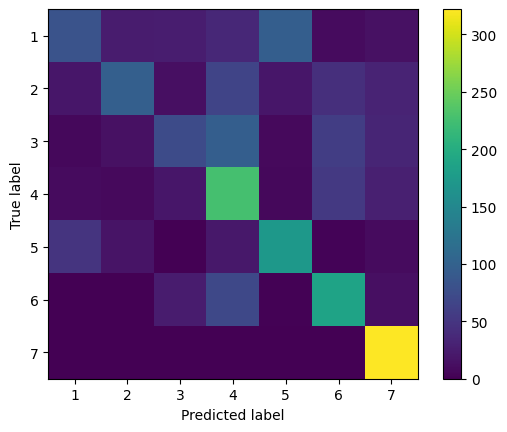

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y.drop_duplicates().sort_values()
conf_mat = confusion_matrix(y, prediction, labels=labels)

ConfusionMatrixDisplay(conf_mat, display_labels=labels).plot(include_values=False);

ROC curve


Classificatie report

In [ ]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, prediction, labels=labels, zero_division=0.0, output_dict=True)).T

,precision,recall,f1-score,support
1,0.496970,0.285714,0.362832,287.000000
2,0.602484,0.334483,0.430155,290.000000
3,0.468354,0.255172,0.330357,290.000000
4,0.439922,0.646724,0.523645,351.000000
5,0.562092,0.632353,0.595156,272.000000
6,0.529745,0.629630,0.575385,297.000000
7,0.712389,0.993827,0.829897,324.000000
accuracy,0.549976,0.549976,0.549976,0.549976
macro avg,0.544565,0.539700,0.521061,2111.000000
weighted avg,0.544114,0.549976,0.525883,2111.000000
